## Calibration

The purpose of this notebook is to calibrate the camera by:
* Computing the calibration matrix and distortion coefficients from chessboard images
* Applying a distortion correction to raw images

In [1]:
import os, math
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

### Chessboards
* Three of the images were taken too close to find all of the corners


In [7]:
def chessboard_calibrate(chess_w, chess_l, show=False):
    chess_counter = 0
    obj_pts = []
    img_pts = []
    
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 0.001)
    obj_corners = np.zeros((chess_w*chess_l, 3), np.float32)
    obj_corners[:,:2] = np.mgrid[0:chess_w,0:chess_l].T.reshape(-1,2)
    
    #Find chessboard corners and plot distorted chessboards
    cal_files = os.listdir(os.path.join(os.getcwd(), 'camera_cal'))
    cal_files.sort()
    fig_dist   = plt.figure(figsize=(15,12))
    for i, cal_file in enumerate(cal_files):
        cal_img = mpimg.imread(os.path.join(os.getcwd(), 'camera_cal', cal_file))
        gray_cal = cv2.cvtColor(cal_img, cv2.COLOR_RGB2GRAY)
        ret, corners = cv2.findChessboardCorners(gray_cal, (chess_w, chess_l), None)
        if ret == True:
            chess_counter += 1
            obj_pts.append(obj_corners)
            corners_2 = cv2.cornerSubPix(gray_cal, corners, (11,11), (-1,-1), criteria)
            img_pts.append(corners_2)
            cal_img = cv2.drawChessboardCorners(cal_img, (chess_w, chess_l), corners_2, ret)
            ax = plt.subplot(5, 4, i+1)
            ax.set_title(cal_file)
            plt.imshow(cal_img)
    
    print('Found {0} {1}x{2} chessboards in {3} images'.format(chess_counter,
                                                              chess_w,
                                                              chess_l,
                                                              i + 1))
    #Compute calibration matrices from object and image points
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(obj_pts, img_pts, cal_img.shape[:-1], None, None)
    
    #Undistort chessboards and plot undistorted chessboards
    fig_undist = plt.figure(figsize=(15,12))
    for i, cal_file in enumerate(cal_files):
        cal_img = mpimg.imread(os.path.join(os.getcwd(), 'camera_cal', cal_file))
        dst = cv2.undistort(cal_img, mtx, dist, None, mtx)
        ax = plt.subplot(5, 4, i+1)
        ax.set_title('corrected_{0}'.format(cal_file))
        plt.imshow(dst)
    
    if show:
        plt.show()

    return mtx, dist

Found 17 9x6 chessboards in 20 images


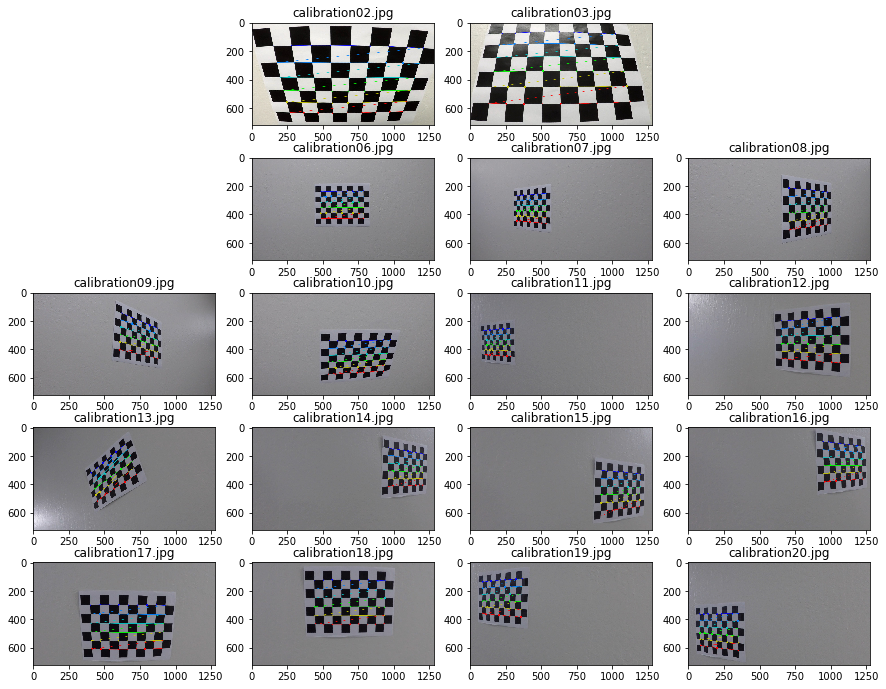

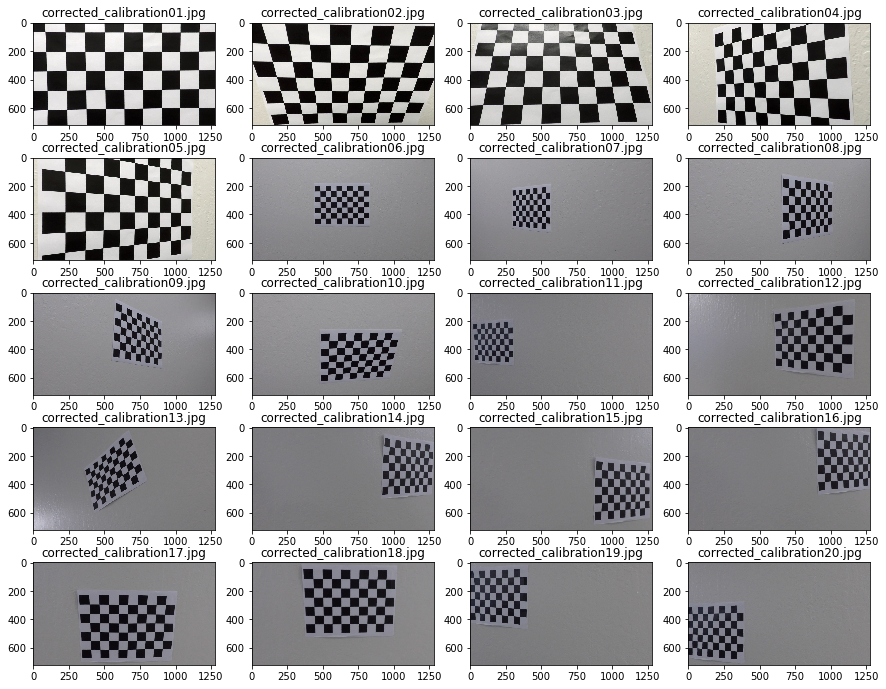

Found 1 9x5 chessboards in 20 images


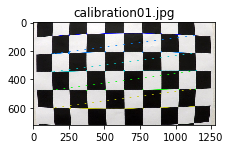

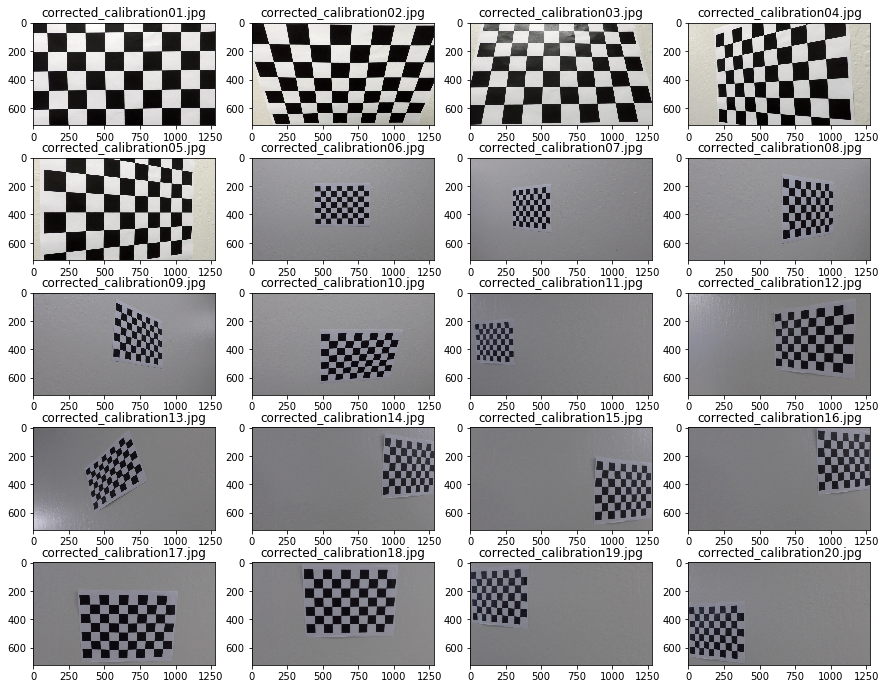

Found 2 8x6 chessboards in 20 images


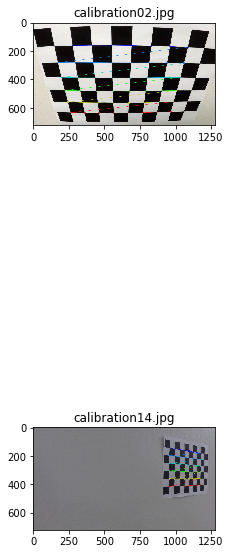

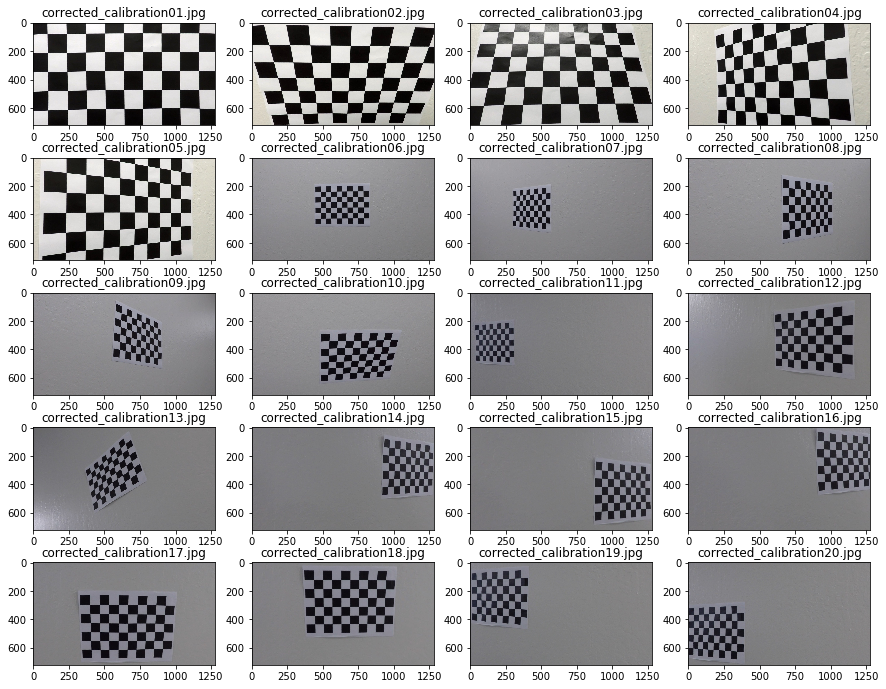

In [8]:
mtx_0, dist_0 = chessboard_calibrate(9, 6, show=True)
mtx_1, dist_1 = chessboard_calibrate(9, 5, show=True)
mtx_2, dist_2 = chessboard_calibrate(8, 6, show=True)

### Corrected Images
* The test images below are first shown undistorted and then corrected
* The images are difficult to contrast. It is easier to see a contrast by looking at the hood of the car at the bottom of the image.
* A chessboard pattern is used to show how the image is undistorted.
* The 9x6 calibration matrices were used because 85% of the images were recognized as 9x6 chessboards.

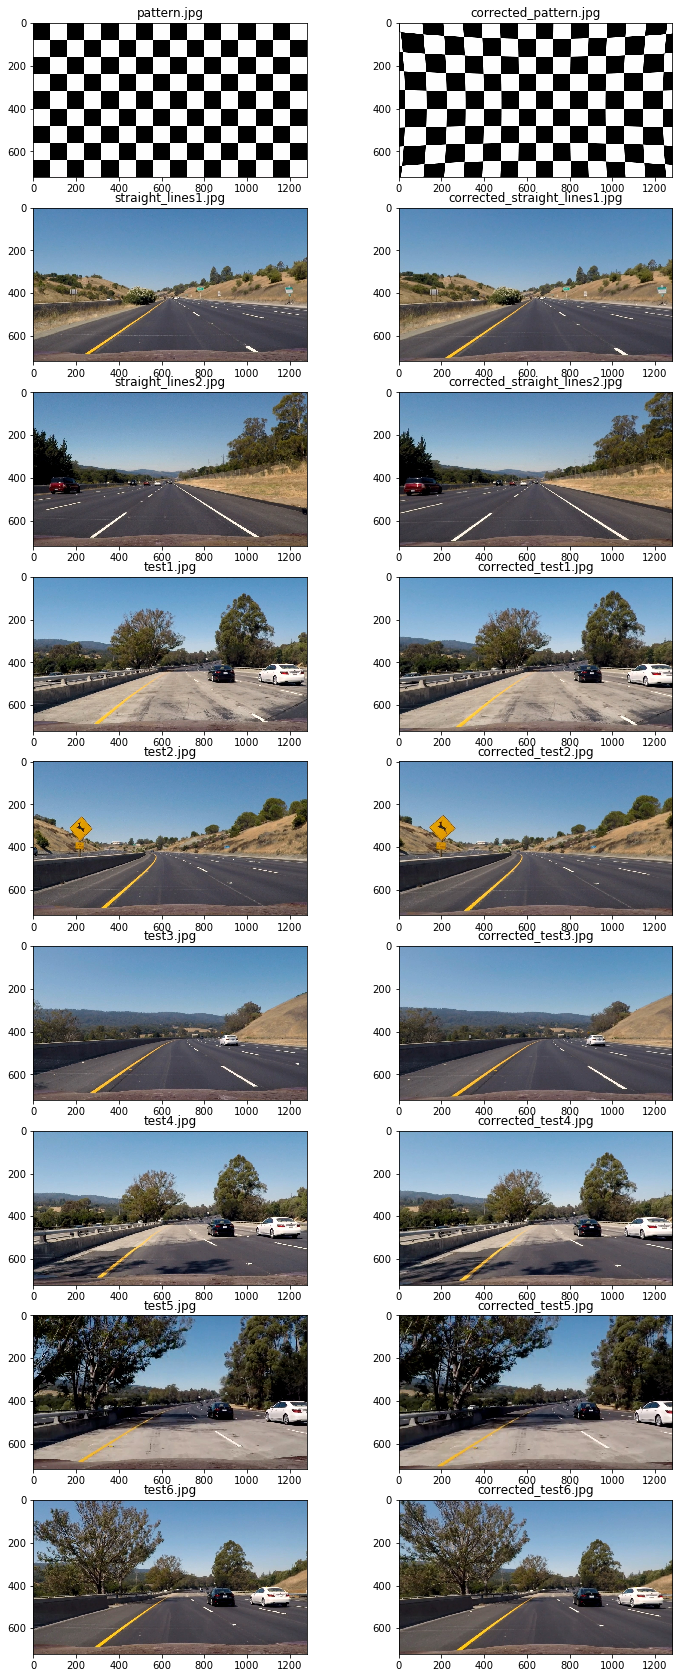

In [11]:
fig3 = plt.figure(figsize=(12,30))
test_files = os.listdir(os.path.join(os.getcwd(), 'test_images'))
test_files.sort()
for i, test_file in enumerate(test_files):
    test_img = mpimg.imread(os.path.join(os.getcwd(), 'test_images', test_file))
    dst = cv2.undistort(test_img, mtx_0, dist_0, None, mtx_0)
    
    ax = plt.subplot(9, 2, 2*i+1)
    ax.set_title('{0}'.format(test_file))
    plt.imshow(test_img)
    ax = plt.subplot(9, 2, 2*i+2)
    ax.set_title('corrected_{0}'.format(test_file))
    plt.imshow(dst)
plt.show()
